# BADS7604 Deep Learning - Project Assignment

### By Soravis Prommas 6220422082

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, sgd, Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)      

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('./datasets/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2239 images belonging to 2 classes.


In [7]:
validation_set = validation_datagen.flow_from_directory('./datasets/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 559 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('./datasets/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1200 images belonging to 2 classes.


In [9]:
hist = model.fit(training_set, epochs = 140, validation_data = validation_set)


Epoch 1/140
70/70 [==============================] - 17s 242ms/step - loss: 0.6873 - accuracy: 0.5534 - val_loss: 0.6295 - val_accuracy: 0.5581
Epoch 2/140
70/70 [==============================] - 14s 198ms/step - loss: 0.6844 - accuracy: 0.5578 - val_loss: 0.6716 - val_accuracy: 0.5581
Epoch 3/140
70/70 [==============================] - 14s 205ms/step - loss: 0.6851 - accuracy: 0.5578 - val_loss: 0.6376 - val_accuracy: 0.5581
Epoch 4/140
70/70 [==============================] - 14s 205ms/step - loss: 0.6846 - accuracy: 0.5578 - val_loss: 0.6679 - val_accuracy: 0.5599
Epoch 5/140
70/70 [==============================] - 14s 203ms/step - loss: 0.6838 - accuracy: 0.5578 - val_loss: 0.6571 - val_accuracy: 0.5581
Epoch 6/140
70/70 [==============================] - 14s 204ms/step - loss: 0.6836 - accuracy: 0.5587 - val_loss: 0.6962 - val_accuracy: 0.5581
Epoch 7/140
70/70 [==============================] - 14s 206ms/step - loss: 0.6819 - accuracy: 0.5699 - val_loss: 0.6793 - val_accuracy

70/70 [==============================] - 14s 199ms/step - loss: 0.4464 - accuracy: 0.7789 - val_loss: 0.5310 - val_accuracy: 0.8730
Epoch 57/140
70/70 [==============================] - 13s 192ms/step - loss: 0.4393 - accuracy: 0.7816 - val_loss: 0.2495 - val_accuracy: 0.8766
Epoch 58/140
70/70 [==============================] - 13s 189ms/step - loss: 0.4477 - accuracy: 0.7807 - val_loss: 0.3190 - val_accuracy: 0.8837
Epoch 59/140
70/70 [==============================] - 13s 190ms/step - loss: 0.4374 - accuracy: 0.7896 - val_loss: 0.1566 - val_accuracy: 0.8676
Epoch 60/140
70/70 [==============================] - 14s 198ms/step - loss: 0.4280 - accuracy: 0.7990 - val_loss: 0.2073 - val_accuracy: 0.8658
Epoch 61/140
70/70 [==============================] - 14s 194ms/step - loss: 0.4243 - accuracy: 0.8004 - val_loss: 0.3703 - val_accuracy: 0.8265
Epoch 62/140
70/70 [==============================] - 14s 195ms/step - loss: 0.4099 - accuracy: 0.8075 - val_loss: 0.2912 - val_accuracy: 0.885

70/70 [==============================] - 14s 198ms/step - loss: 0.3306 - accuracy: 0.8557 - val_loss: 0.0966 - val_accuracy: 0.8962
Epoch 113/140
70/70 [==============================] - 14s 196ms/step - loss: 0.3003 - accuracy: 0.8651 - val_loss: 0.2354 - val_accuracy: 0.8730
Epoch 114/140
70/70 [==============================] - 14s 196ms/step - loss: 0.3115 - accuracy: 0.8557 - val_loss: 0.1054 - val_accuracy: 0.8855
Epoch 115/140
70/70 [==============================] - 14s 197ms/step - loss: 0.2951 - accuracy: 0.8678 - val_loss: 0.0906 - val_accuracy: 0.8891
Epoch 116/140
70/70 [==============================] - 14s 198ms/step - loss: 0.3014 - accuracy: 0.8660 - val_loss: 0.2265 - val_accuracy: 0.8962
Epoch 117/140
70/70 [==============================] - 14s 198ms/step - loss: 0.3130 - accuracy: 0.8638 - val_loss: 0.1330 - val_accuracy: 0.8748
Epoch 118/140
70/70 [==============================] - 14s 196ms/step - loss: 0.3128 - accuracy: 0.8553 - val_loss: 0.1585 - val_accuracy:

In [10]:
model.save('model.h5')

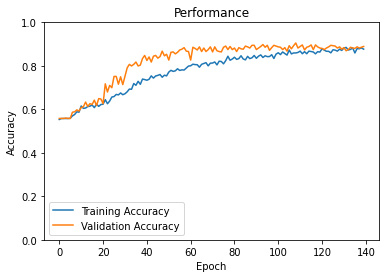

In [11]:
fig = plt.figure(figsize=(6, 4))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0, 1.0)
plt.title("Performance")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy","Validation Accuracy"])
fig.savefig('performance.png', dpi=300)
plt.show()

In [12]:
score = model.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07521814107894897
Test accuracy: 0.903333306312561
